# 1. Zbiór danych
<p>
Zbiór danych dotyczący zdatności wody do picia. Zawiera 20 cech, które przedstawiają zawartość poszczególnych związków chemicznych, pierwiastków i mikroorganizmów oraz cechę określającą zdatność do spożycia.
</p>
https://www.kaggle.com/mssmartypants/water-quality

## Wczytanie zbioru

In [92]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

data = pd.read_csv('datasets/waterQuality1.csv', delimiter=',')
data = data[data.is_safe != '#NUM!']
data = data[data.ammonia != '#NUM!']
data['ammonia'] = pd.to_numeric(data['ammonia'])
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


## Usuwanie losowych wartości

In [145]:
for index, row in data.iterrows():
    if index % 2 == 0:
        random_col = np.random.choice(samples.columns)
        data.at[index, random_col] = np.nan

## Zastąpienie brakujących wartości średnią

In [133]:
means = data.mean(axis=0)
for index, value in means.items():
    data[index].fillna(value=value, inplace=True)

## Zastąpienie brakujących wartości medianą

In [142]:
medians = data.median(axis=0)
for index, value in medians.items():
    data[index].fillna(value=value, inplace=True)

## Zastąpienie najczęściej występujacą wartością

In [144]:
value = data['is_safe'].value_counts().idxmax()
data['is_safe'].fillna(value=value, inplace=True)

# 2. Statystyki opisowe i podsumowujące

In [43]:
data.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7817.000000,7804.000000,7806.000000,7792.000000,7812.000000,7814.000000,7778.000000,7817.000000,7808.000000,7810.000000,7794.000000,7820.000000,7797.000000,7797.000000,7813.000000,7812.000000,7804.000000,7808.000000,7796.000000,7822.000000
mean,0.664438,14.270530,0.161611,1.568178,0.042744,2.173087,0.247702,0.806542,0.771890,0.319403,0.328460,0.099323,9.813794,1.329143,0.005193,16.446389,2.918756,0.049617,0.148126,0.044632
std,1.263710,8.871597,0.252980,1.217541,0.035983,2.563128,0.270940,0.654774,0.435842,0.329342,0.378004,0.058163,5.542499,0.573602,0.002969,17.680578,2.326476,0.028778,0.143750,0.026916
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.590000,0.030000,0.550000,0.008000,0.100000,0.050000,0.090000,0.400000,0.000000,0.002000,0.048000,5.010000,1.000000,0.003000,2.170000,0.810000,0.020000,0.040000,0.020000
50%,0.070000,14.100000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.920000,1.420000,0.005000,7.720000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,22.122500,0.100000,2.490000,0.070000,4.230000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.680000,0.070000,0.240000,0.070000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Columns: 4019 entries, aluminium to 6700
dtypes: float64(20), object(3999)
memory usage: 245.5+ MB


## Zależności między zmiennymi
Scatter ploty między każdą parą zmiennych. Na przekątnej wykres gęstości prawdopodobieństwa (rozkład) zmiennej.

In [ ]:
import seaborn as sns

sns.pairplot(data)
plt.show()

#### Zmiennej podejrzane o relacje

In [ ]:
sns.pairplot(data[['bacteria', 'viruses']])
plt.show()

## Tabela korelacji

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(16, 9), dpi=80)

corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Histogramy

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')


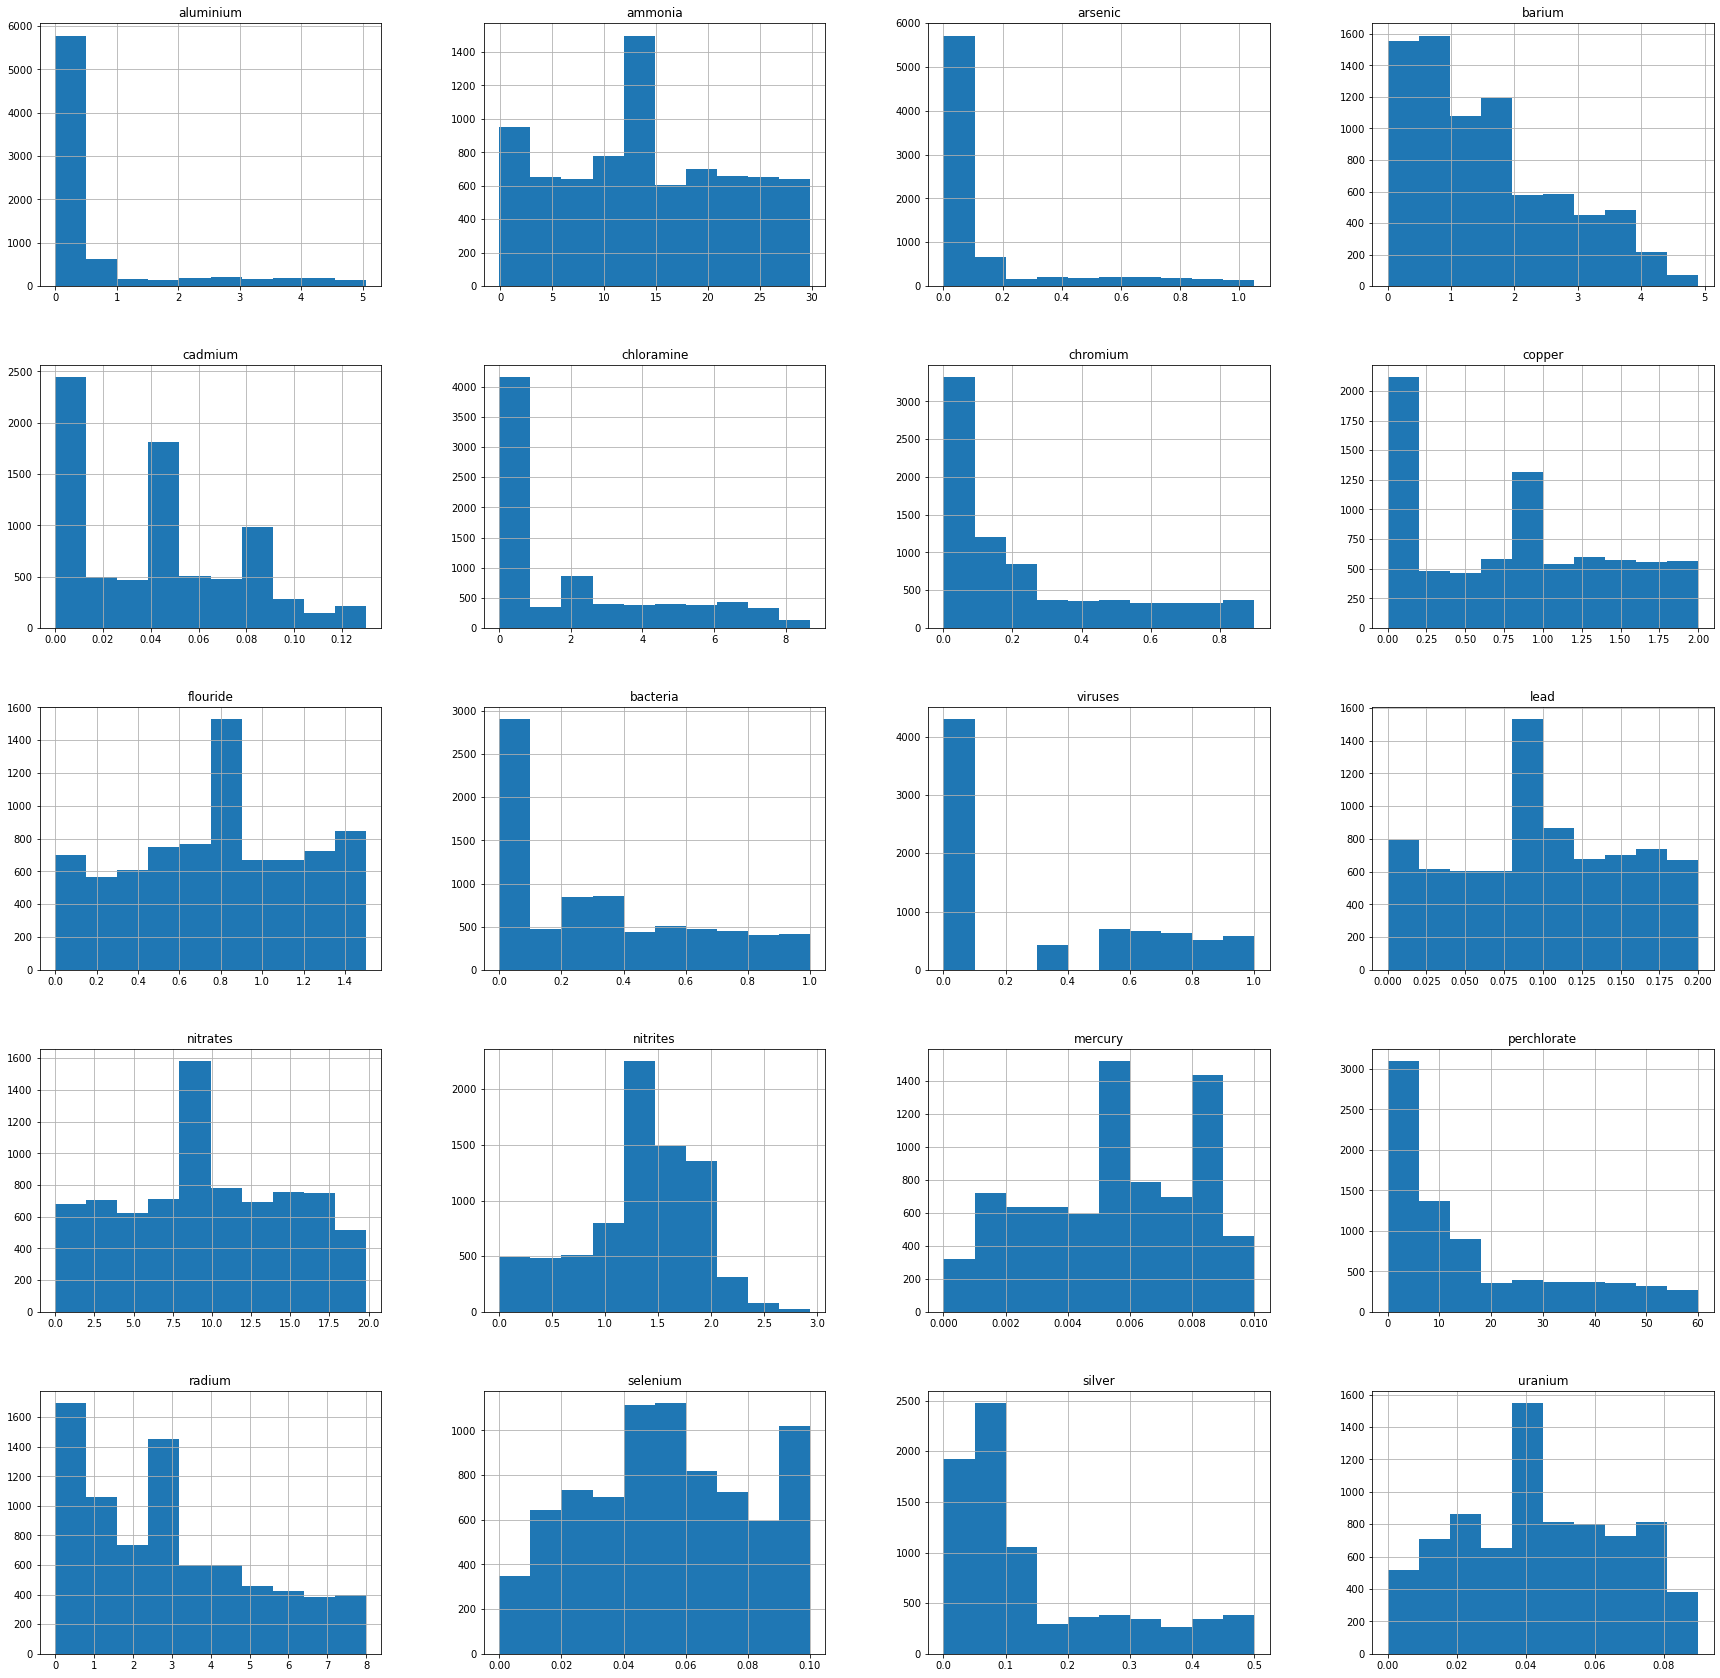

In [146]:
print(data.columns)

data.hist(figsize=(30, 30))
plt.show()

## Boxploty

In [ ]:
data.boxplot(figsize=(30, 30))
plt.show()

#### Odfiltrowanie wartości odstających

In [ ]:
filtered = data[data['viruses']>0.1]
filtered = filtered[filtered['bacteria']>0]
sns.pairplot(filtered[['bacteria', 'viruses']])
plt.show()
filtered[['viruses', 'bacteria']].boxplot()

In [ ]:
filtered.info()

# 3. Skalowanie cech

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(data[['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']])
data_scaled = scaler.transform(data[['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']])

data_scaled = pd.DataFrame(np.append(data_scaled, data[['is_safe']].to_numpy(), axis=1), dtype=float)
data_scaled.columns = data.columns

data_scaled.boxplot(figsize=(30, 9))
plt.show()
data_scaled.describe()